# Optimization

<h2>Table of Contents</h2>


1. Libraries Required to load
2. Dataset
3. Dataset Preview
4. Objective Function
6. Simulations 
    - Monte Carlo
    - Greedy Hill Climb
    - Simulated Annealing
7. Saving and exporting the optimum results

# Libraries

Json, pymongo, pandas, psycopg2, plotly

In [1]:
# Importing Packages
import json
import pandas as pd
import pandas.io.sql as sqlio
import random
import numpy as np

# Load Dataset

In [2]:
df=pd.read_csv('compare_run.csv')

## Dataset Preview

In [3]:
df.head()

,Run,Number_of_Signals,Inter_arrival_time,Average_Delay,Trains_per_Hour
0,0.0,6.0,50.000000,9.22,1.0
1,1.0,10.0,66.196667,7.92,1.0
2,2.0,23.0,43.014667,19.17,1.0
3,3.0,6.0,32.757667,3.86,2.0
4,4.0,18.0,16.567667,20.00,4.0


In [4]:
df.describe()

,Run,Number_of_Signals,Inter_arrival_time,Average_Delay,Trains_per_Hour
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,15.000000,47.844513,14.754900,1.610000
std,29.011492,7.672593,17.081817,13.352373,1.516875
min,0.000000,2.000000,5.505667,0.410000,1.000000
25%,24.750000,8.000000,36.822958,5.935000,1.000000
50%,49.500000,15.000000,49.372917,12.785000,1.000000
75%,74.250000,22.000000,61.533375,19.162500,2.000000
max,99.000000,30.000000,78.265833,103.920000,11.000000


## Perform OLS regression, with 'Trains_per_hour' as the target variable and 'Inter_arrival_time' and 'Average_Delay' as the predictor variables

In [5]:
# Travel Optimization
simulation_data = df
pd.options.mode.chained_assignment = None
 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
pd.options.mode.chained_assignment = None
target = df['Trains_per_Hour']
predictor = df[['Inter_arrival_time', 'Average_Delay']]
predictor = sm.add_constant(predictor)
 
model = sm.OLS(target, predictor).fit()
predictions = model.predict(predictor)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Trains_per_Hour   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     79.77
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           3.27e-21
Time:                        21:39:27   Log-Likelihood:                -134.43
No. Observations:                 100   AIC:                             274.9
Df Residuals:                      97   BIC:                             282.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4637      0.365      9.494      0.000       2.740       4.188
Inter_arrival_time    -0.0511      0.006     -8.432      0.000      -0.063      -0.039
Average_Delay          0.0402      0.008      5.180      0.000       0.025       0.056
==============================================================================
Omnibus:                       93.532   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1211.819
Skew:                           2.914   Prob(JB):                    7.19e-264
Kurtosis:                      19.027   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The Independent Variables seem to be significant with p-value < 0.05

### Objective Function

In [6]:
#linear regression to find objective function
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
 
def f(x,y):
    return 2.9450 + -0.0329*x + 0.0025*y

## Monte Carlo Optimisation

In [7]:
def monte_carlo(n, xmin=5, xmax=30, ymin=0, ymax=30):
    
    x = [ random.randint(xmin, xmax) for i in range(n)]
    y = [ random.randint(ymin, ymax) for i in range(n)]
    
    xp = [ x[0] ]
    yp = [ y[0] ]
    fmin = f(xp[0], yp[0])
    for i in range(1, len(x)):
        fi = f(x[i], y[i])
        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi
            
    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
      
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)
    
    plt.scatter(x, y, c='red', marker='.')

    plt.plot(xp, yp, c='red')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(4, 29, 0, 1.9909)

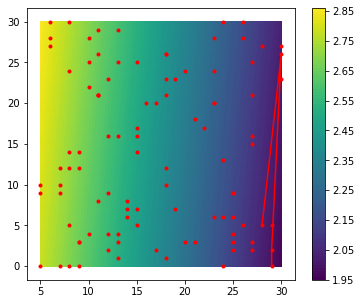

In [8]:
random.seed(20)
monte_carlo(100)

(2, 30, 3, 1.9654999999999998)

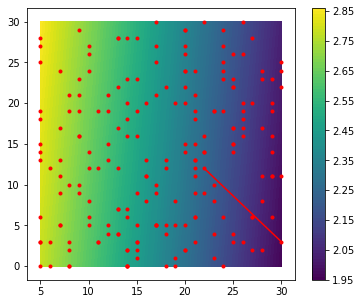

In [9]:
random.seed(30)
monte_carlo(200)

(5, 30, 1, 1.9604999999999997)

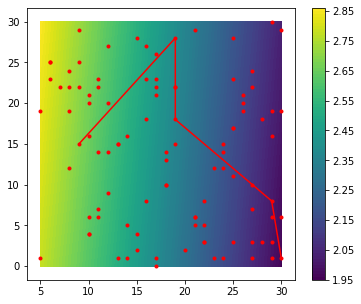

In [10]:
random.seed(100)
monte_carlo(100)

(5, 30, 13, 1.9904999999999997)

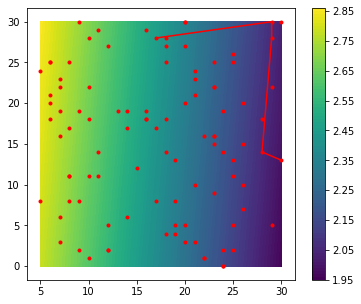

In [11]:
random.seed(25)
monte_carlo(100)

### The optimum values obtained from Monte Carlo optimisation are
    - Inter Arrival Time as      - 30
    - The Average Delay is       - 13
    - Number of Trains per hour  - 1.99
    
##### Is Average Delay Time <= Inter_Arrival_Time/2      -     YES

### Defining the Neighbours function

In [12]:
def neighbours(x, y, xmin, xmax, ymin, ymax, K=1):
    return  \
        [ (x+i, y)   for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax ] + \
        [ (x,   y+i) for i in range(-K, K+1) \
                        if i!=0 and ymin<=y+i and y+i<=xmax ] + \
        [ (x+i, y+i) for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y+i and y+i<=ymax ] + \
        [ (x+i, y-i) for i in range(-K, K+1) \
                        if i!=0 and xmin<=x+i and x+i<=xmax and ymin<=y-i and y-i<=ymax ]

## Hill Climbing

In [13]:
def hill_climbing(xmin=5, xmax=60, ymin=0, ymax=30):
    
    x0 = random.randint(xmin, xmax)
    y0 = random.randint(ymin, ymax)
    
    xp = [ x0 ]
    yp = [ y0 ]
    fmin = f(x0, y0)
    # print(f"{' x'} {' y'} {'f(x, y)':>9s}")
    # print(f"{x0:2d} {y0:2d} {fmin:9.3f}")
    while True:
        xi = xp[-1]
        yi = yp[-1]
        fi = fmin
        for xy in neighbours(xi, yi, xmin, xmax, ymin, ymax):
            if xy!=None:
                x, y = xy
                ff = f(x, y)
                if ff < fi:
                    xi = x
                    yi = y
                    fi = ff
        if fi == fmin:
            break
    
        xp += [xi]
        yp += [yi]
        fmin = fi
        # print(f"{xi:2d} {yi:2d} {fi:9.3f}")
            
    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
      
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)

    plt.plot(xp, yp, c='red', lw=1)
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(1, 39, 40, 1.7619)

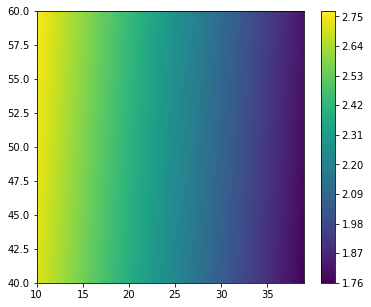

In [14]:
hill_climbing(10,39,40,60)

(16, 30, 15, 1.9954999999999998)

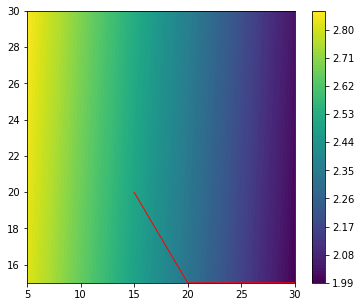

In [15]:
hill_climbing(5,30,15,30)

### The optimum values obtained from Greedy Hill Climb optimisation are
    - Inter Arrival Time as      - 30
    - The Average Delay is       - 15
    - Number of Trains per hour  - 1.96
    
##### Is Average Delay Time <= Inter_Arrival_Time/2      -     YES

## Simulated Annealing

In [16]:
import random
random.seed(0)

In [17]:
def simulated_annealing(T=1000, k=10, 𝜶=0.6, ε=0.001, xmin=5, xmax=60, ymin=0, ymax=50, K=5):
    
    x0 = random.randint(xmin, xmax)
    y0 = random.randint(ymin, ymax)
    
    xp = [ x0 ]
    yp = [ y0 ]
    
    while T > ε:
        k = k+1
        for i in range(k):
            u = random.random()
            xi = xp[-1]
            yi = yp[-1]
            fi = f(xi, yi)
            xs, ys = random.choice(neighbours(xi, yi, xmin, xmax, ymin, ymax, K))
            fs = f(xs, ys)
            if fs < fi or u <= math.exp((fi-fs)/T):
                xp += [xs]
                yp += [ys]
        T = 𝜶*T
     
    x = np.linspace(xmin, xmax, 100)
    y = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(x, y)
    z=f(xx,yy)
      
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(x, y, z, 100)
    fig.colorbar(cs, ax=ax)

    plt.plot(xp, yp, c='red')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(285, 60, 0, 0.9709999999999999)

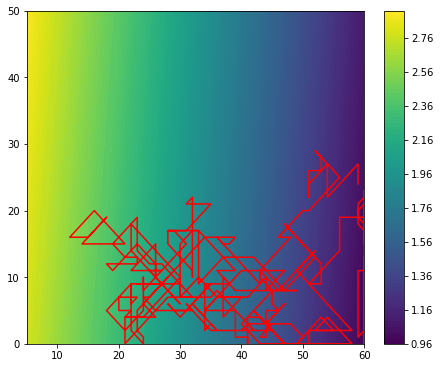

In [18]:
random.seed(0)
simulated_annealing(𝜶=0.5, ε=0.001)

(100, 60, 35, 1.0584999999999998)

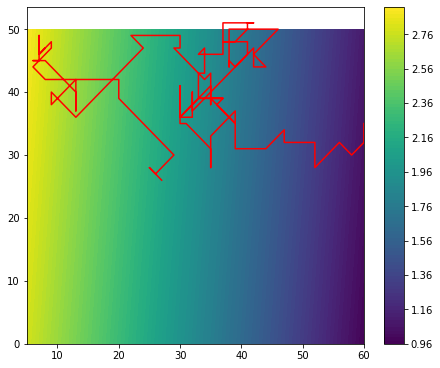

In [19]:
#random.seed(0)
simulated_annealing(𝜶=0.2, ε=0.01)

(5914, 60, 0, 0.9709999999999999)

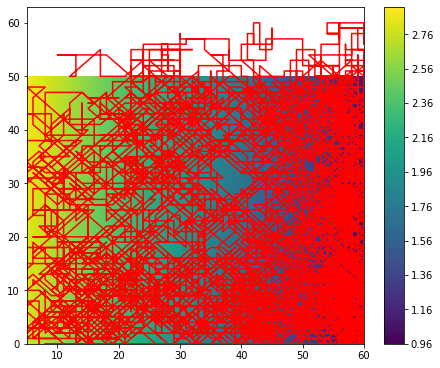

In [20]:
random.seed(0)
simulated_annealing(𝜶=0.9, ε=0.001)

(73, 27, 11, 2.0841999999999996)

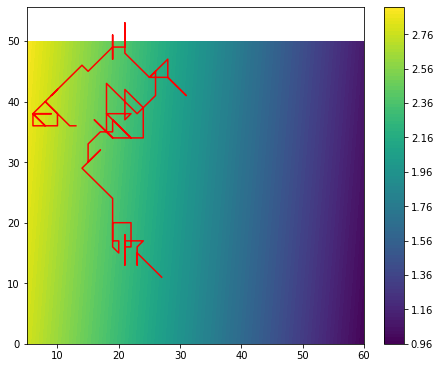

In [21]:
random.seed(1)
simulated_annealing(T=100, 𝜶=0.2, ε=0.01)

### The optimum values obtained from Simulated Annealing optimisation are
    - Inter Arrival Time as      - 27
    - The Average Delay is       - 11
    - Number of Trains per hour  - 2.08
    
##### Is Average Delay Time <= Inter_Arrival_Time/2      -     YES

### Saving and exporting the Optimum results

In [22]:
models = ['Monte Carlo', 'Greedy Hill Climbing', 'Simulated Annealing']
IAR = [30,30,27]
Average_Delay = [13,15,11]
Number_of_trains = [1.96,1.99,2.08]
df_optimized = pd.DataFrame(columns=['Optimization_Algorithms','Average_Delay', 'Inter_Arrival_Time', 'Number_of_Trains'])

In [23]:
for i in range(len(models)):
    dfobj = {'Optimization_Algorithms':models[i],'Average_Delay':Average_Delay[i], 'Inter_Arrival_Time':IAR[i],\
             'Number_of_Trains':Number_of_trains[i]}
    df_optimized = df_optimized.append(dfobj, ignore_index=True)
    

## The Result

In [24]:
df_optimized

,Optimization_Algorithms,Average_Delay,Inter_Arrival_Time,Number_of_Trains
0,Monte Carlo,13,30,1.96
1,Greedy Hill Climbing,15,30,1.99
2,Simulated Annealing,11,27,2.08


In [25]:
df_optimized.to_csv('MSO_Optimization.csv', index=False)